In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('/Users/apple/Desktop/bank-case/data-cleaned.csv')

In [3]:
df.dropna(subset = ['Jan_Repay_Status'], axis = 0, inplace = True)
df.dropna(subset = ['Feb_Repay_Status'], axis = 0, inplace = True)
df.dropna(subset = ['Mar_Repay_Status'], axis = 0, inplace = True)
df.dropna(subset = ['Apr_Repay_Status'], axis = 0, inplace = True)
df.dropna(subset = ['May_Repay_Status'], axis = 0, inplace = True)
df.dropna(subset = ['Jun_Repay_Status'], axis = 0, inplace = True)
df.dropna(subset = ['July_Payment_Status'], axis = 0, inplace = True)

In [4]:
X = df[['Jan_Repay_Status','Feb_Repay_Status','Mar_Repay_Status','Apr_Repay_Status','May_Repay_Status','Jun_Repay_Status']]
y = df['July_Payment_Status']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (24372, 6) (24372,)
Test set: (6094, 6) (6094,)


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
RF = RandomForestClassifier().fit(X_train,y_train)
RF

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [7]:
RF.fit (X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [8]:
Y_hat = RF.predict (X_test)

In [9]:
from sklearn import metrics
import matplotlib.pyplot as plt
print ("RandomForest's Accuracy: ", metrics.accuracy_score (y_test, Y_hat) )

RandomForest's Accuracy:  0.819658680669511


In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, Y_hat, labels=[1,0]))

[[ 483  855]
 [ 244 4512]]


In [13]:
cnf_matrix = confusion_matrix(y_test, Y_hat, labels=[1,0])
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[ 483  855]
 [ 244 4512]]


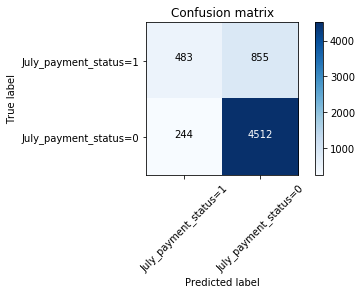

In [14]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['July_payment_status=1','July_payment_status=0'],normalize= False,  title='Confusion matrix')